In [1]:
#Import needed packages 
import pandas as pd
import matplotlib.pyplot as plot
import numpy as np
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
###Comprendre les variables 

In [ ]:
##Reading and exploring data
data = pd.read_csv('train_transaction.csv')

In [22]:
#Reading and exploring data
data=pd.read_csv('creditcard.csv')

In [4]:
data.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
data.shape

(590540, 394)

In [6]:
data.describe()

,TransactionID,isFraud,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
count,5.905400e+05,590540.000000,5.905400e+05,590540.000000,590540.000000,581607.000000,588975.000000,586281.000000,524834.000000,524834.000000,...,82351.000000,82351.000000,82351.000000,82351.000000,82351.000000,82351.00000,82351.000000,82351.000000,82351.000000,82351.000000
mean,3.282270e+06,0.034990,7.372311e+06,135.027176,9898.734658,362.555488,153.194925,199.278897,290.733794,86.800630,...,0.775874,721.741883,1375.783644,1014.622782,9.807015,59.16455,28.530903,55.352422,151.160542,100.700882
std,1.704744e+05,0.183755,4.617224e+06,239.162522,4901.170153,157.793246,11.336444,41.244453,101.741072,2.690623,...,4.727971,6217.223583,11169.275702,7955.735482,243.861391,387.62948,274.576920,668.486833,1095.034387,814.946722
min,2.987000e+06,0.000000,8.640000e+04,0.251000,1000.000000,100.000000,100.000000,100.000000,100.000000,10.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,3.134635e+06,0.000000,3.027058e+06,43.321000,6019.000000,214.000000,150.000000,166.000000,204.000000,87.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
50%,3.282270e+06,0.000000,7.306528e+06,68.769000,9678.000000,361.000000,150.000000,226.000000,299.000000,87.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
75%,3.429904e+06,0.000000,1.124662e+07,125.000000,14184.000000,512.000000,150.000000,226.000000,330.000000,87.000000,...,0.000000,0.000000,25.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
max,3.577539e+06,1.000000,1.581113e+07,31937.391000,18396.000000,600.000000,231.000000,237.000000,540.000000,102.000000,...,55.000000,160000.000000,160000.000000,160000.000000,55125.000000,55125.00000,55125.000000,104060.000000,104060.000000,104060.000000


In [7]:
list(data.columns)

['TransactionID',
 'isFraud',
 'TransactionDT',
 'TransactionAmt',
 'ProductCD',
 'card1',
 'card2',
 'card3',
 'card4',
 'card5',
 'card6',
 'addr1',
 'addr2',
 'dist1',
 'dist2',
 'P_emaildomain',
 'R_emaildomain',
 'C1',
 'C2',
 'C3',
 'C4',
 'C5',
 'C6',
 'C7',
 'C8',
 'C9',
 'C10',
 'C11',
 'C12',
 'C13',
 'C14',
 'D1',
 'D2',
 'D3',
 'D4',
 'D5',
 'D6',
 'D7',
 'D8',
 'D9',
 'D10',
 'D11',
 'D12',
 'D13',
 'D14',
 'D15',
 'M1',
 'M2',
 'M3',
 'M4',
 'M5',
 'M6',
 'M7',
 'M8',
 'M9',
 'V1',
 'V2',
 'V3',
 'V4',
 'V5',
 'V6',
 'V7',
 'V8',
 'V9',
 'V10',
 'V11',
 'V12',
 'V13',
 'V14',
 'V15',
 'V16',
 'V17',
 'V18',
 'V19',
 'V20',
 'V21',
 'V22',
 'V23',
 'V24',
 'V25',
 'V26',
 'V27',
 'V28',
 'V29',
 'V30',
 'V31',
 'V32',
 'V33',
 'V34',
 'V35',
 'V36',
 'V37',
 'V38',
 'V39',
 'V40',
 'V41',
 'V42',
 'V43',
 'V44',
 'V45',
 'V46',
 'V47',
 'V48',
 'V49',
 'V50',
 'V51',
 'V52',
 'V53',
 'V54',
 'V55',
 'V56',
 'V57',
 'V58',
 'V59',
 'V60',
 'V61',
 'V62',
 'V63',
 'V64',
 'V

In [ ]:
###import numpy as np
import numpy as np
data=data[np.isfinite(data)]

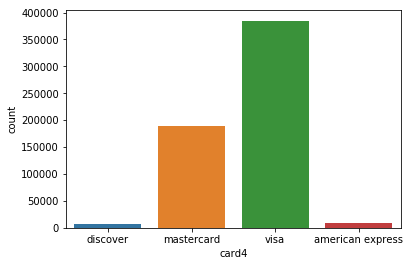

In [8]:
#Visualizing cards categories
sns.countplot(data['card4'])

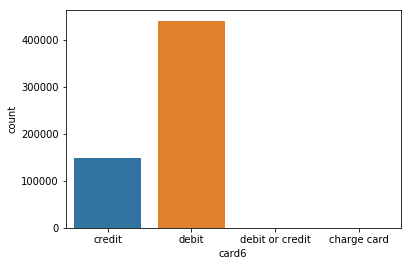

In [9]:
#Counting Transactions categories 
sns.countplot(data['card6'])

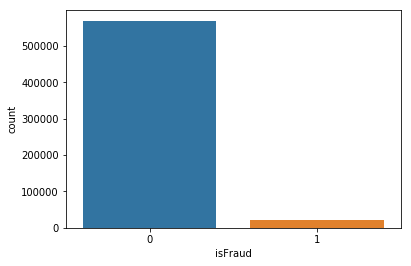

In [10]:
#Visualizing database classes (IsFraud)
sns.countplot(data['isFraud'])

In [15]:
##Viewing Fraud class by credit card category:
null_percentage = 100 *  data["card4"].isnull().sum() / len(data["card4"]) ##a lot of null values
print("{:.1f}% of values in the card4 table are null.".format(null_percentage))

fraud_by_card_type = data.groupby("card4")["isFraud"].value_counts()
total_by_card_type = data.groupby("card4")["isFraud"].count()

fraud_by_card_type_frac = fraud_by_card_type / total_by_card_type
fraud_by_card_type_frac

0.3% of values in the card4 table are null.


card4             isFraud
american express  0          0.971302
                  1          0.028698
discover          0          0.922718
                  1          0.077282
mastercard        0          0.965669
                  1          0.034331
visa              0          0.965244
                  1          0.034756
Name: isFraud, dtype: float64

In [16]:
#The total fraud in the dataset
fraud_count = data[data["isFraud"] == 1]["isFraud"].count()
fraud_fraction = fraud_count / data["isFraud"].count()
print("Total fraud fraction in the dataset: {:.3f}".format(fraud_fraction))

General fraud fraction in the dataset: 0.035


Text(0, 0.5, 'Fraction')

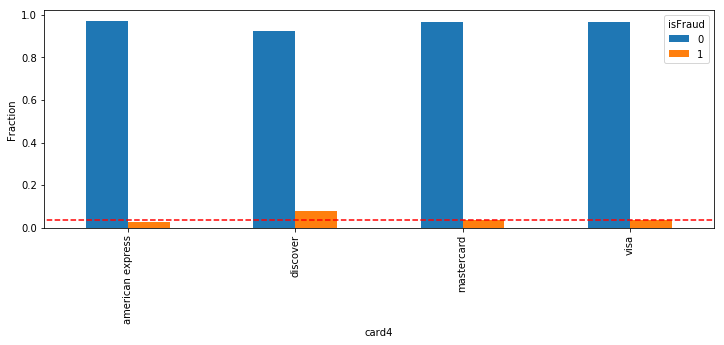

In [17]:
#Visualizing fraud calsses by credit card category
ax = fraud_by_card_type_frac.unstack().plot(kind="bar", figsize = (12, 4))
ax.plot([-1,4], [fraud_fraction, fraud_fraction], "r--")
ax.set_ylabel("Fraction")

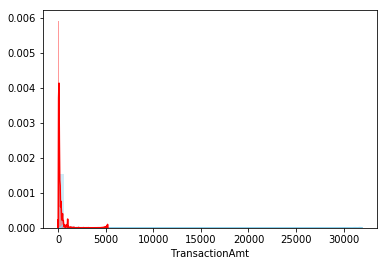

In [11]:
###Visualizing the two classes distribution :
sns.distplot( data.loc[data["isFraud"]==0]['TransactionAmt'] , color="skyblue")
sns.distplot( data.loc[data["isFraud"]==1]['TransactionAmt'] , color="red")

In [12]:
# data processing:preparing training features and target 
variables = ['TransactionAmt'] + ['V%d' % number for number in range(1,340)]
target = 'isFraud'
#traning data 
X = data[variables]
y = data[target]

In [13]:
#Viewing independant variables
X.head()

,TransactionAmt,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,68.5,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,29.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,59.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,50.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,50.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
#Viewing the target:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: isFraud, dtype: int64

In [18]:
# As noticed there is a lot of of Nan values :
#Missing values per feature 
data.isnull().sum()

TransactionID          0
isFraud                0
TransactionDT          0
TransactionAmt         0
ProductCD              0
card1                  0
card2               8933
card3               1565
card4               1577
card5               4259
card6               1571
addr1              65706
addr2              65706
dist1             352271
dist2             552913
P_emaildomain      94456
R_emaildomain     453249
C1                     0
C2                     0
C3                     0
C4                     0
C5                     0
C6                     0
C7                     0
C8                     0
C9                     0
C10                    0
C11                    0
C12                    0
C13                    0
                   ...  
V310                  12
V311                  12
V312                  12
V313                1269
V314                1269
V315                1269
V316                  12
V317                  12
V318                  12


To handle these missing values,and because of the shape of the dataset,it is suggested to divid the it depending on the features categories



In [23]:
###Features C:
c_features = list(map(lambda n : f"C{n}", range(1, 15)))
data_c =data[c_features]
data_c.head()

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14
0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,1.0
1,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0
2,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0
3,2.0,5.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0,0.0,1.0,0.0,25.0,1.0
4,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0


In [24]:
data_c.isnull().sum()
#There are no missing values:

C1     0
C2     0
C3     0
C4     0
C5     0
C6     0
C7     0
C8     0
C9     0
C10    0
C11    0
C12    0
C13    0
C14    0
dtype: int64

In [25]:
###Features D:
d_features = list(map(lambda n : f"D{n}", range(1, 16)))
data_d = data[d_features]
data_d.head()

,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15
0,14.0,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,13.0,13.0,NaN,NaN,NaN,0.0
1,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0
2,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,315.0,NaN,NaN,NaN,315.0
3,112.0,112.0,0.0,94.0,0.0,NaN,NaN,NaN,NaN,84.0,NaN,NaN,NaN,NaN,111.0
4,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
data_d.isnull().sum()
#Many missing values per feature

D1       1269
D2     280797
D3     262878
D4     168922
D5     309841
D6     517353
D7     551623
D8     515614
D9     515614
D10     76022
D11    279287
D12    525823
D13    528588
D14    528353
D15     89113
dtype: int64

In [31]:
data_d_null_frac = data_d.isnull().sum() / len(data_d)
data_d_null_frac
##Features with the majority of null values would be eliminated
##Only feautures with a null fraction of less than 0.25 would be taken into consideration

D1     0.002149
D2     0.475492
D3     0.445149
D4     0.286047
D5     0.524674
D6     0.876068
D7     0.934099
D8     0.873123
D9     0.873123
D10    0.128733
D11    0.472935
D12    0.890410
D13    0.895093
D14    0.894695
D15    0.150901
dtype: float64

In [37]:
data_d=data_d[["D1", "D10", "D15"]]

In [32]:
#Features M:
m_features = list(map(lambda n : f"M{n}", range(1, 10)))
data_m = data[m_features]
data_m.head()

,M1,M2,M3,M4,M5,M6,M7,M8,M9
0,T,T,T,M2,F,T,NaN,NaN,NaN
1,NaN,NaN,NaN,M0,T,T,NaN,NaN,NaN
2,T,T,T,M0,F,F,F,F,F
3,NaN,NaN,NaN,M0,T,F,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
data_m.isnull().sum()
data_m_null_frac = data_m.isnull().sum() / len(data_m)
data_m_null_frac

M1    0.459071
M2    0.459071
M3    0.459071
M4    0.476588
M5    0.593494
M6    0.286788
M7    0.586353
M8    0.586331
M9    0.586331
dtype: float64

In [39]:
#The same thing here only M6 will be keept
data_m=data_m['M6']

In [35]:
#Features V:
v_features = list(map(lambda n : f"V{n}", range(1, 340)))
data_v = data[v_features]
data_v.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [40]:
data_v.isnull().sum()
data_v_null_frac = data_v.isnull().sum() / len(data_v)
data_v_null_frac

V1      0.472935
V2      0.472935
V3      0.472935
V4      0.472935
V5      0.472935
V6      0.472935
V7      0.472935
V8      0.472935
V9      0.472935
V10     0.472935
V11     0.472935
V12     0.128819
V13     0.128819
V14     0.128819
V15     0.128819
V16     0.128819
V17     0.128819
V18     0.128819
V19     0.128819
V20     0.128819
V21     0.128819
V22     0.128819
V23     0.128819
V24     0.128819
V25     0.128819
V26     0.128819
V27     0.128819
V28     0.128819
V29     0.128819
V30     0.128819
          ...   
V310    0.000020
V311    0.000020
V312    0.000020
V313    0.002149
V314    0.002149
V315    0.002149
V316    0.000020
V317    0.000020
V318    0.000020
V319    0.000020
V320    0.000020
V321    0.000020
V322    0.860550
V323    0.860550
V324    0.860550
V325    0.860550
V326    0.860550
V327    0.860550
V328    0.860550
V329    0.860550
V330    0.860550
V331    0.860550
V332    0.860550
V333    0.860550
V334    0.860550
V335    0.860550
V336    0.860550
V337    0.8605

In [59]:
#Keep only features with fraction less than 0.25
V=pd.DataFrame(data_v_null_frac)
V=V.reset_index()

In [64]:
features=list(V[V[0]<0.25]['index'])
data_v=data_v[features]
data_v.head()

,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,...,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321
0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,135.0,0.0,0.0,0.0,50.0,1404.0,790.0,0.0,0.0,0.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [67]:
#Data preparation for the training:
#There a lot of methods to impute missing values,for this task the imputation using the mean is chosen
d_imputer = SimpleImputer(strategy = "mean")
d_imputed = d_imputer.fit_transform(data_d)

In [69]:
#The same thing for features v
v_imputer = SimpleImputer(strategy = "mean")
v_imputed = v_imputer.fit_transform(data_v)

In [77]:
#Encoding categorical variables:
card4_one_hot = pd.get_dummies(data["card4"], dummy_na = True)
cd_one_hot = pd.get_dummies(data["ProductCD"])
m_one_hot = pd.get_dummies(data_m, dummy_na = True)

In [80]:
amt = np.array([data["TransactionAmt"]]).T

In [92]:
#Merging all the prepared sub datsets:
X=np.concatenate((data_c, d_imputed, m_one_hot.values, v_imputed, card4_one_hot.values, cd_one_hot.values, amt), axis = 1)

In [93]:
#Normalizing data in classification may increase the accuracy:
scaler = preprocessing.MinMaxScaler()
X = scaler.fit_transform(X)

In [94]:
#Applying PCD to reduce data dimension (increase accuracy):
pca = PCA(n_components = 35)
X = pca.fit_transform(X)
print("{:.2f}% of variance is retained".format(100 * pca.explained_variance_ratio_.cumsum()[-1]))#the variance retained

98.96% of variance is retained


In [95]:
y = data["isFraud"].values

In [97]:
#Dividing dataset for train and test:
X_train, X_cv, y_train, y_cv = train_test_split(X, y, test_size = 0.02, random_state = 13)

In [98]:
model_lr = LogisticRegression().fit(X_train, y_train)

C:\Users\abdellaouia\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [100]:
#Measuring accuracy on the training dataset
model_lr.score(X_train, y_train)

0.9656868758952809

In [101]:
#Measuring accuracy on the test dataset
model_lr.score(X_cv, y_cv)

0.9638472610278553

1-Logistic regression model provide a high accuracy on both training and test datasets


2-Logistic regression model is a suitable model to detect fraudulant transactions